In [ ]:
# Install Twint in current Juypter Kernal (may take a while, output will appear)
import sys
!{sys.executable} -m pip install twint

In [2]:
# Import packages to use
import twint
import pandas as pd
import numpy as np
import requests
import re


# Patches asyncio to allow the running of multiple event loops in Jupyter Notebooks.
# Fixes: "RuntimeError: This event loop is already running"
import nest_asyncio

nest_asyncio.apply()

In [ ]:
# TWINT has a large number of configuration options
# https://github.com/twintproject/twint/wiki/Configuration
# Some of the most useful are since, until and output

In [ ]:
# Get a specific users tweets between dates shown and output to a csv file
# Check Jupyter homepage tab for csv file. Can be read into other python programs, Notebooks and cells.

c = twint.Config()

# # # Specify date # # #

#c.Since = "2021-11-20"
c.Until = "2022-02-07"
c.Limit = 1000 # multiple of 20 # upper limit of search

c.Search = "covid OR omicron"  # Use "AND OR" in the string to include words in search"
c.Lang = "en"
# c.Verified = False # verified users
c.Count = True

# # # Specify location # # #
#c.Near = "Singapore"
c.Geo = "1.352449,103.795754,13km" # latitude, longitude, radius(km)

c.Show_hashtags = True

# c.Output_csv = True
# c.Output = 'raw_tweets_omicron_20112021-31122021.csv' # It will add onto the file, not replace
c.Pandas = True
# c.Pandas_clean = True
twint.run.Search(c)

df = twint.storage.panda.Tweets_df
df.to_csv("raw_tweets_2.csv")


[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[+] Finished: Successfully collected 0 Tweets.


# Clean data

In [ ]:
# CLEAN DATA#

df = pd.read_csv("raw_tweets_011121_to_180222.csv")

df.shape
df.info




<bound method DataFrame.info of       Unnamed: 0                   id      conversation_id    created_at  \
0              0  1494570540492746752  1494037029809639424  1.645168e+12   
1              1  1494569613597999110  1494569613597999110  1.645168e+12   
2              2  1494565702053031936  1494565702053031936  1.645167e+12   
3              3  1494564420777017344  1494564420777017344  1.645167e+12   
4              4  1494563533010669568  1494563533010669568  1.645167e+12   
...          ...                  ...                  ...           ...   
3479        3479  1455193273144791045  1455193273144791045  1.635780e+12   
3480        3480  1455189213096206340  1455189213096206340  1.635779e+12   
3481        3481  1455178339254079490  1455178339254079490  1.635777e+12   
3482        3482  1455051954229432324  1455051954229432324  1.635746e+12   
3483        3483  1454999866770444288  1454999866770444288  1.635734e+12   

                     date  timezone  \
0     2022-02-18

In [ ]:
# pd.set_option("display.max_rows", None)
for i in range(len(df.index)):
    text = df.iloc[i]['tweet'] # get an entry
    text = re.sub(r"http\S+", "", text) # \S+ means all text behind
    text = re.sub(r"@\S+", "", text)
    df.loc[i, 'tweet'] = text

df = df.drop_duplicates(subset=['username', 'tweet'])
df.shape
df

,Unnamed: 0,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,0,1494570540492746752,1494037029809639424,1.645168e+12,2022-02-18 15:12:39,800,NaN,Yeah because it’s not logical to assume a...,en,[],...,"1.352449,103.795754,13km",NaN,NaN,NaN,NaN,"[{'screen_name': '5everMamba', 'name': 'Mamba ...",NaN,NaN,NaN,NaN
1,1,1494569613597999110,1494569613597999110,1.645168e+12,2022-02-18 15:08:58,800,NaN,ramainya orang positive covid. like so sudden ...,en,[],...,"1.352449,103.795754,13km",NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,2,1494565702053031936,1494565702053031936,1.645167e+12,2022-02-18 14:53:25,800,NaN,Planned visit by British lawmakers to Taiwan p...,en,[],...,"1.352449,103.795754,13km",NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,3,1494564420777017344,1494564420777017344,1.645167e+12,2022-02-18 14:48:20,800,NaN,Parents of kids with Covid-19 urged to avoid g...,en,[],...,"1.352449,103.795754,13km",NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,4,1494563533010669568,1494563533010669568,1.645167e+12,2022-02-18 14:44:48,800,NaN,Covid-19: Hong Kong leader says citywide testi...,en,[],...,"1.352449,103.795754,13km",NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3479,3479,1455193273144791045,1455193273144791045,1.635780e+12,2021-11-01 23:21:27,800,NaN,"2,470 new Covid-19 cases in S'pore, 14 deaths;...",en,[],...,"1.352449,103.795754,13km",NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3480,3480,1455189213096206340,1455189213096206340,1.635779e+12,2021-11-01 23:05:19,800,NaN,WHO calls for more experts to study Covid-19's...,en,[],...,"1.352449,103.795754,13km",NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3481,3481,1455178339254079490,1455178339254079490,1.635777e+12,2021-11-01 22:22:06,800,NaN,My mom just contracted Covid. Wtf.,en,[],...,"1.352449,103.795754,13km",NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3482,3482,1455051954229432324,1455051954229432324,1.635746e+12,2021-11-01 13:59:54,800,NaN,"Singapore 'making progress' on COVID-19 front,...",en,[],...,"1.352449,103.795754,13km",NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [ ]:
df1 = df.sort_values(by=['date'], ascending=True)

# df1 = df.sort_values(by=['username'], ascending=True)
df2 = df1.loc[df['language'] == 'en', ['date','user_id','username','tweet']] # filter language english, display only these two columns
df2.set_index('date')
# username_set = set(df['username'])
# username_set 

# df1.drop_duplicates(subset = ["tweet"],inplace=True) # clear rows that are complete duplicates (cannot work because the id is diff)
df2.to_csv("cleaned_data.csv") # output to csv
df2

,date,user_id,username,tweet
3483,2021-11-01 10:32:55,858018061,AndrewTAviation,First trip since Covid started ! Let's go !! ...
3482,2021-11-01 13:59:54,1453990572,_rodahidup,"Singapore 'making progress' on COVID-19 front,..."
3481,2021-11-01 22:22:06,257862528,Shuraim_Basir,My mom just contracted Covid. Wtf.
3480,2021-11-01 23:05:19,1453990572,_rodahidup,WHO calls for more experts to study Covid-19's...
3479,2021-11-01 23:21:27,1453990572,_rodahidup,"2,470 new Covid-19 cases in S'pore, 14 deaths;..."
...,...,...,...,...
4,2022-02-18 14:44:48,10872822,sehof,Covid-19: Hong Kong leader says citywide testi...
3,2022-02-18 14:48:20,27378369,Chinesepop,Parents of kids with Covid-19 urged to avoid g...
2,2022-02-18 14:53:25,10872822,sehof,Planned visit by British lawmakers to Taiwan p...
1,2022-02-18 15:08:58,721674142764834817,NURRASHIDAHHH,ramainya orang positive covid. like so sudden ...


In [ ]:
# number of tweets pass through API

df = df2 

CONCEPT_API_KEY = ''
POLARITY_API_KEY = ''
EMOTION_API_KEY = ''

def analyse(text, LANG, KEY):
    APIURL = 'https://sentic.net/api/' + LANG + '/' + KEY + '.py?text='
    
    # label is the concept, polarity that is returned from API
    label = str(requests.get(APIURL + text).content)[2:-3]
    return label

concept_array = []
polarity_array = []
emotion_array = []

# ! ! ! Choose certain rows to do ! ! ! #
# df = df.iloc[998:1000]
df_length = len(df.index)
for i in range(df_length): 
    text = df.iloc[i]['tweet'] # get an entry

    # replacing characters that API cannot process
    illegal_characters = [';', '&', '#']
    for ic in illegal_characters:
        text = text.replace(ic, ':')
    if not (i%100): print(i)
    
    concept_array.append(analyse(text, 'en', CONCEPT_API_KEY))
    polarity_array.append(analyse(text, 'en', POLARITY_API_KEY))
    emotion_array.append(analyse(text, 'en', EMOTION_API_KEY))

# TODO:#Change to add as column
df['concept'] = concept_array
df['polarity'] = polarity_array
df['emotion'] = emotion_array

df.to_csv("tweets_passed_api.csv")
df

# 5 min can 200


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279


,date,user_id,username,tweet,concept,polarity,emotion
3483,2021-11-01 10:32:55,858018061,AndrewTAviation,First trip since Covid started ! Let's go !! ...,"['let go', 'airport terminal', 'trip', 'covid'...",POSITIVE,"['#contentment', '#acceptance']"
3482,2021-11-01 13:59:54,1453990572,_rodahidup,"Singapore 'making progress' on COVID-19 front,...","['progress', 'covid', 'warns', 'surprises']",NEGATIVE,"['#grief', '#loathing']"
3481,2021-11-01 22:22:06,257862528,Shuraim_Basir,My mom just contracted Covid. Wtf.,"['covid', 'wtf']",NEGATIVE,"['#anger', None]"
3480,2021-11-01 23:05:19,1453990572,_rodahidup,WHO calls for more experts to study Covid-19's...,"['study', 'covid', 'disputed', 'origin']",POSITIVE,"['#ecstasy', '#delight']"
3479,2021-11-01 23:21:27,1453990572,_rodahidup,"2,470 new Covid-19 cases in S'pore, 14 deaths;...","['down to', 'growth rate', 'new', 'covid', 'po...",NEGATIVE,"['#grief', None]"
...,...,...,...,...,...,...,...
4,2022-02-18 14:44:48,10872822,sehof,Covid-19: Hong Kong leader says citywide testi...,"['covid', 'hong', 'leader', 'citywide', 'testi...",NEGATIVE,"['#loathing', '#rage']"
3,2022-02-18 14:48:20,27378369,Chinesepop,Parents of kids with Covid-19 urged to avoid g...,"['covid', 'urge', 'avoid', 'hospital', 'recove...",NEGATIVE,"['#grief', '#terror']"
2,2022-02-18 14:53:25,10872822,sehof,Planned visit by British lawmakers to Taiwan p...,"['covid', 'ministry']",NEGATIVE,"['#grief', '#loathing']"
1,2022-02-18 15:08:58,721674142764834817,NURRASHIDAHHH,ramainya orang positive covid. like so sudden ...,"['positive', 'covid']",POSITIVE,"['#joy', '#bliss']"


# Analysis

In [3]:
import nltk
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from wordcloud import WordCloud, STOPWORDS
sns.set(style='darkgrid')


In [4]:
df = pd.read_csv("tweets_passed_api.csv")
# df = df.iloc[:, 1:] # drop first column
df.drop(columns=df.columns[0], 
        axis=1, 
        inplace=True)
df.drop(labels=2791, 
        axis=0, 
        inplace=True)   # delete a row with malay, use labels = list() for diff indices

df['parsed date'] = pd.to_datetime(df['date'])
df['month'] = df['parsed date'].dt.month
df.head()
df.dtypes



date                   object
user_id                 int64
username               object
tweet                  object
concept                object
polarity               object
emotion                object
parsed date    datetime64[ns]
month                   int64
dtype: object

In [25]:
df.head()

,date,user_id,username,tweet,concept,polarity,emotion,parsed date,month
0,2021-11-01 10:32:55,858018061,AndrewTAviation,First trip since Covid started ! Let's go !! ...,"['let go', 'airport terminal', 'trip', 'covid'...",POSITIVE,"['#contentment', '#acceptance']",2021-11-01 10:32:55,11
1,2021-11-01 13:59:54,1453990572,_rodahidup,"Singapore 'making progress' on COVID-19 front,...","['progress', 'covid', 'warns', 'surprises']",NEGATIVE,"['#grief', '#loathing']",2021-11-01 13:59:54,11
2,2021-11-01 22:22:06,257862528,Shuraim_Basir,My mom just contracted Covid. Wtf.,"['covid', 'wtf']",NEGATIVE,"['#anger', None]",2021-11-01 22:22:06,11
3,2021-11-01 23:05:19,1453990572,_rodahidup,WHO calls for more experts to study Covid-19's...,"['study', 'covid', 'disputed', 'origin']",POSITIVE,"['#ecstasy', '#delight']",2021-11-01 23:05:19,11
4,2021-11-01 23:21:27,1453990572,_rodahidup,"2,470 new Covid-19 cases in S'pore, 14 deaths;...","['down to', 'growth rate', 'new', 'covid', 'po...",NEGATIVE,"['#grief', None]",2021-11-01 23:21:27,11


In [26]:
df_groupby_month = df.groupby(by = ['month', 'polarity']).count()
df_groupby_month

date  user_id  username  tweet  concept  emotion  parsed date
month polarity                                                               
1     NEGATIVE   105      105       105    105      105      105          105
      POSITIVE    96       96        96     96       96       96           96
2     NEGATIVE  1453     1453      1453   1453     1453     1453         1453
      NEUTRAL      7        7         7      7        7        7            7
      POSITIVE  1220     1220      1220   1220     1220     1220         1220
11    NEGATIVE   159      159       159    159      159      159          159
      POSITIVE   117      117       117    117      117      117          117
12    NEGATIVE   150      150       150    150      150      150          150
      NEUTRAL      1        1         1      1        1        1            1
      POSITIVE   141      141       141    141      141      141          141

In [29]:
df_un = df.groupby(by = ['username']).count().sort_values(by = ['date'], ascending = False)
df_un

,date,user_id,tweet,concept,polarity,emotion,parsed date,month
username,,,,,,,,
_rodahidup,293,293,293,293,293,293,293,293
temptempholder,173,173,173,173,173,173,173,173
ChannelNewsAsia,145,145,145,145,145,145,145,145
STForeignDesk,113,113,113,113,113,113,113,113
Chinesepop,104,104,104,104,104,104,104,104
...,...,...,...,...,...,...,...,...
abhiuxdesigner,1,1,1,1,1,1,1,1
abcdeenfg_,1,1,1,1,1,1,1,1
aarriianax,1,1,1,1,1,1,1,1


In [31]:
len(df['username'].unique())
#unique_username = df['username'].unique()


1356

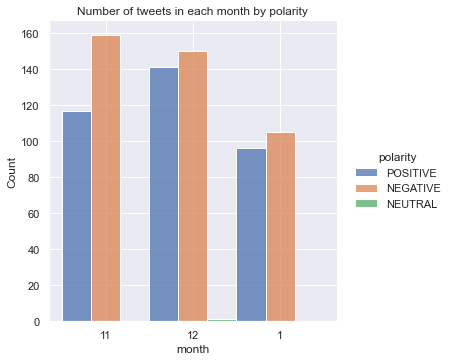

In [12]:
# df3 = df[df['month'] != 2]
# sns.displot(data = df3, x = df3['month'].astype(str), hue = "polarity", kind = "hist", multiple = "dodge").set(title = "Number of tweets in each month by polarity")


sns.displot(data = df, x = df['month'].astype(str), hue = "polarity", kind = "hist", multiple = "dodge").set(title = "Number of tweets in each month by polarity")
# the histograms are overlapped, that's why the colour is weird
# The number of neutral comments is very little

## Wordcloud

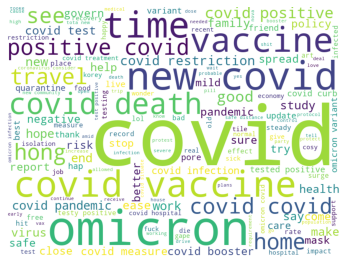

In [33]:
# Create a word cloud for tweets collected, may take sometime

#concept_list = df['concept'].to_list()[:3]
concept_list = df['concept'].to_list()
#print(concept_list)

words = ''
stopwords = set(STOPWORDS)

# Iterate through tweets
for concept_str in concept_list:
    """# Convert to string
    value = str(value)
    # Tokenize
    tokens = value.split()
    # Convert each to lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()"""
    
    concept_str = concept_str[1:-1]
    concept_str = concept_str.replace("NOT", "")
    tokens = concept_str.split(', ')
    #print("tokens: ", tokens)
    tokens = [word[1:-1] for word in tokens]

    # Add to word
    words += " ".join(tokens)+ " "
    #print(words)

# Word cloud setup
wordcloud = WordCloud(width = 800, height = 600,
                     background_color = 'white',
                     stopwords = stopwords,
                     min_font_size = 10).generate(words)

# Plot
plt.figure(figsize=(6,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

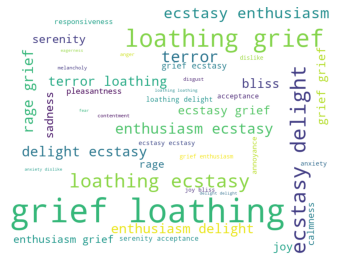

In [25]:
# Create a word cloud for tweets collected, may take sometime

#emotion_list = df['concept'].to_list()[:3]
emotion_list = df['emotion'].to_list()
#print(concept_list)

words = ''
stopwords = set(STOPWORDS)

# Iterate through tweets
for str in emotion_list:

    str = str[1:-1]
    tokens = str.split(', ')
    #print("tokens: ", tokens)
    tokens = [word[1:-1] for word in tokens]
    # Add to word
    words += " ".join(tokens)+ " "
    #print(words)

# Word cloud setup
wordcloud = WordCloud(width = 800, height = 600,
                     background_color = 'white',
                     stopwords = stopwords,
                     min_font_size = 10).generate(words)

# Plot
plt.figure(figsize=(6,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [61]:
#df = pd.read_csv("cleaned_data.csv")

df = pd.read_csv("tweets_passed_api.csv")
#summary_df = df.groupby(['username', 'polarity', 'emotion']).count()
summary_df = df.groupby(['polarity']).count()

summary_df = summary_df.sort_values(by=['date'], ascending = False)

summary_df.to_csv("username_count.csv")

username_list = df['username'].tolist()
username_list

summary_df

,Unnamed: 0,date,user_id,username,tweet,concept,emotion
polarity,,,,,,,
NEGATIVE,1867,1867,1867,1867,1867,1867,1867
POSITIVE,1575,1575,1575,1575,1575,1575,1575
NEUTRAL,8,8,8,8,8,8,8


In [ ]:
df = pd.read_csv("analysed_tweets_2.csv")

#df = pd.read_csv("tweets_passed_api.csv")
df.groupby(['username']).count()

In [ ]:
# Check the username is in "media"
names = ['John','Catlin','Mike']
df[df.name.isin(names)]
# >>> df[~df.country.isin(countries_to_keep)]


In [ ]:
# testing code for data frame
l = []

for i in range(5):
    l.append(chr(65 + i))
l.append("I am cool")
df1 = pd.DataFrame(l, index = range(6), columns = ["alphabet"])
df1["polarity"] = [1,2,1,2,1,2]

df1

# default inplace = False
df2 = df1.drop([0], axis = 0) # axis = 0 means drop the row (0 is int)
print(df2)

print(df2.loc[1, "alphabet"])   # access a certain cell
if (df2.loc[1, "alphabet"] == 'B'): df2.drop([1], inplace = True) # drop a certain row
df2
